In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import scipy.signal as signal
%matplotlib notebook

In [4]:
# Load features and labels from separate CSV files
features_df = pd.read_csv('./data/X_wavelet_852.356.csv')
labels_df = pd.read_csv('./data/Y_wavelet_852.356.txt')

In [5]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094
0,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,...,0.0596,0.0596,0.0596,0.0596,0.0596,0.0596,0.0596,0.0596,0.0596,0.0595
1,0.107,0.107,0.107,0.107,0.107,0.107,0.107,0.107,0.107,0.107,...,0.0618,0.0619,0.0619,0.0619,0.0619,0.0619,0.0619,0.0619,0.0619,0.0620
2,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,...,0.0594,0.0594,0.0594,0.0594,0.0594,0.0594,0.0594,0.0593,0.0593,0.0593
3,0.106,0.106,0.106,0.106,0.106,0.106,0.106,0.106,0.106,0.106,...,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608
4,0.103,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,...,0.0603,0.0603,0.0603,0.0603,0.0603,0.0604,0.0604,0.0604,0.0604,0.0604


In [6]:
labels_df.head()

,y0,y1
0,1066,0.032
1,1065,0.035
2,1066,0.039
3,1041,0.022
4,1048,0.039


In [7]:
merged_df = pd.merge(features_df, labels_df, left_index=True, right_index=True)

In [8]:
merged_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,y0,y1
0,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,0.105,...,0.0596,0.0596,0.0596,0.0596,0.0596,0.0596,0.0596,0.0595,1066,0.032
1,0.107,0.107,0.107,0.107,0.107,0.107,0.107,0.107,0.107,0.107,...,0.0619,0.0619,0.0619,0.0619,0.0619,0.0619,0.0619,0.0620,1065,0.035
2,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,...,0.0594,0.0594,0.0594,0.0594,0.0594,0.0593,0.0593,0.0593,1066,0.039
3,0.106,0.106,0.106,0.106,0.106,0.106,0.106,0.106,0.106,0.106,...,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,0.0608,1041,0.022
4,0.103,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,0.104,...,0.0603,0.0603,0.0603,0.0604,0.0604,0.0604,0.0604,0.0604,1048,0.039


In [9]:
sample = merged_df.iloc[1]

In [10]:
sample.iloc[0:4095].values

array([0.107 , 0.107 , 0.107 , ..., 0.0619, 0.0619, 0.062 ])

In [11]:
print(merged_df.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4087', '4088', '4089', '4090', '4091', '4092', '4093', '4094', 'y0',
       'y1'],
      dtype='object', length=4097)


In [12]:
sample[['y0', 'y1']].values
np.asarray([sample['y0'], sample['y1']*10])

array([1.065e+03, 3.500e-01])

In [13]:
# Save the merged data to a new CSV file
merged_df.to_csv('./data/merged_data_wavelet.csv', index=False)

In [2]:
# Read data from .csv file
data = np.genfromtxt('./data/foo_852.356_8.2nF.csv', delimiter=',')

<IPython.core.display.Javascript object>


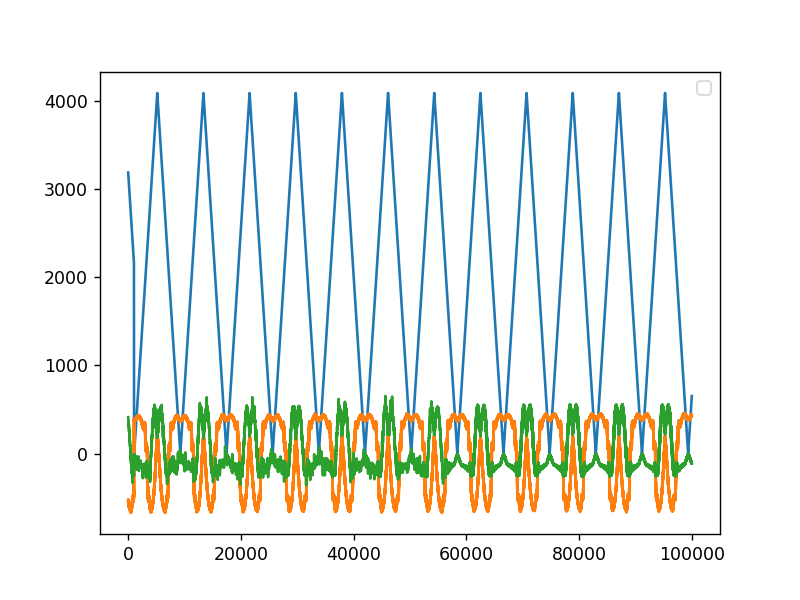

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [3]:
# Visulaize data

# 0th column -> ramp
# 1st column -> pd1
# 2nd column -> pd2

plt.close()
plt.plot(data[:,0])
plt.plot((data[:,1]-np.mean(data[:,1])))
plt.plot((data[:,2]-np.mean(data[:,2])))
plt.legend()
plt.show()

In [4]:
# We will seperate the data of each ramp slope

In [5]:
# get out the indices of minimum and maximum position in ramp value
min_index = np.where(data[:,0] == np.min(data[:,0]))
max_index = np.where(data[:,0] == np.max(data[:,0]))

print(f'min_index length: {np.shape(min_index)[1]}\nmax_index length: {np.shape(max_index)[1]} \n')
print(f'Min_indices: {min_index},\nMax_indices:{max_index}')

min_index length: 13
max_index length: 12 

Min_indices: (array([ 1065,  9255, 17445, 25635, 33825, 42015, 50205, 58395, 66585,
       74775, 82965, 91155, 99345], dtype=int64),),
Max_indices:(array([ 5160, 13350, 21540, 29730, 37920, 46110, 54300, 62490, 70680,
       78870, 87060, 95250], dtype=int64),)


In [6]:
pd1_0 = data[min_index[0][0]:max_index[0][0],1]
pd2_0 = data[min_index[0][0]:max_index[0][0],2]
pd_diff = pd1_0/np.max(pd1_0) - pd2_0/np.max(pd2_0)

In [9]:
# from matplotlib.mlab import cwt

# plt.close()
# # plt.plot(np.fft.fft((pd_diff-np.mean(pd_diff))/np.max(pd_diff))[5:-2])

# # Perform Continuous Wavelet Transform (CWT)
# widths = np.arange(1, 128)
# coefficients = cwt((pd_diff-np.mean(pd_diff))/np.max(pd_diff), np.arange(1,4096), wavelet='cmor')

# # Plot the CWT coefficients
# plt.close()
# plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, 1, 1, 128], cmap='jet', interpolation='bilinear')
# plt.colorbar(label='Magnitude')
# plt.title('Continuous Wavelet Transform')
# plt.xlabel('Time')
# plt.ylabel('Scale')
# plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16664\649889631.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


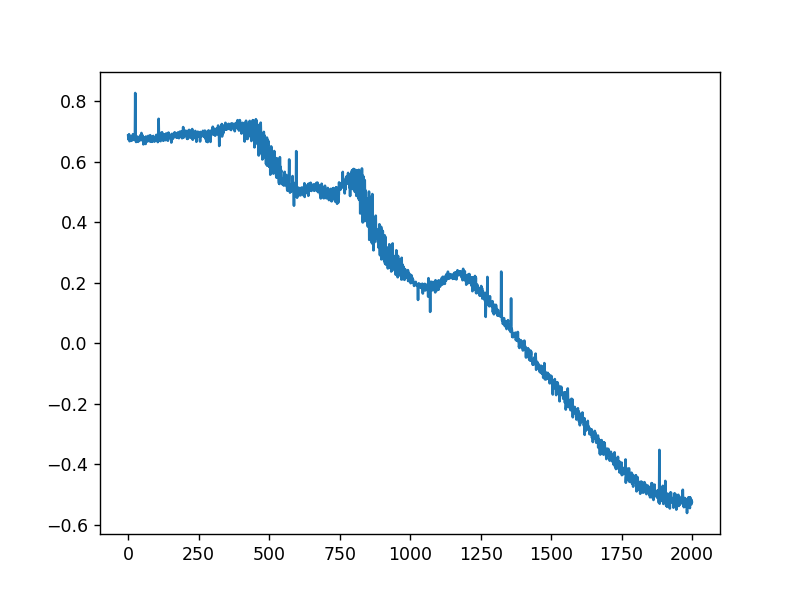

In [10]:
plt.close()
plt.plot(pd_diff[1500:3500])
plt.show()

<IPython.core.display.Javascript object>


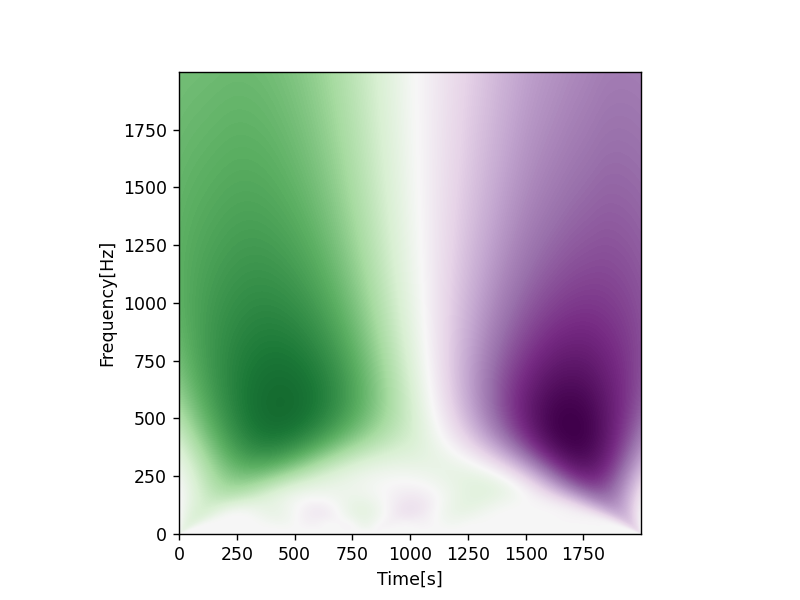

In [13]:
sig = (pd_diff[1500:3500]-np.mean(pd_diff[1500:3500]))
widths = np.arange(1,len(sig))
cwtmatr = signal.cwt(sig, signal.ricker, widths)

cwtmatr_yflip = np.flipud(cwtmatr)

plt.close()
plt.imshow(cwtmatr_yflip, cmap='PRGn', extent=[0, 1999, 0, 1999], vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.xlabel("Time[s]")
plt.ylabel("Frequency[Hz]")
# plt.plot(sig*1000)
# plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
#            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [16]:
coeff, freq = pywt.cwt(sig, widths, 'morl', 1)

In [18]:
cwtmatr.shape

(1999, 2000)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16664\849478546.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


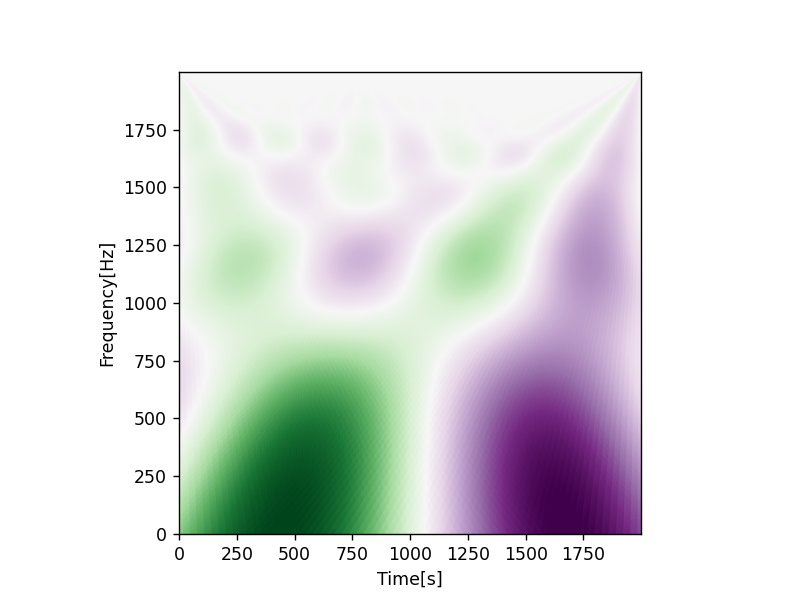

In [20]:
plt.close()
plt.imshow(coeff, cmap='PRGn', extent=[0, 1999, 0, 1999], vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.xlabel("Time[s]")
plt.ylabel("Frequency[Hz]")
# plt.plot(sig*1000)
# plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
#            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [56]:
len(widths)

1999

In [9]:
pd1_0 = (data[min_index[0][0]:max_index[0][0],1])
pd1_0 /= np.max(pd1_0)
pd2_0 = (data[min_index[0][0]:max_index[0][0],2])
pd2_0 /= np.max(pd2_0)
pd_diff0 = pd1_0 - pd2_0
pd_diff0 = (pd_diff0-np.mean(pd_diff0))/np.max(pd_diff0)

In [10]:
pd1_1 = (data[min_index[0][1]:max_index[0][1],1])
pd1_1 /= np.max(pd1_1)
pd2_1 = (data[min_index[0][1]:max_index[0][1],2])
pd2_1 /= np.max(pd2_1)
pd_diff1 = pd1_1 - pd2_1
pd_diff1 = (pd_diff1-np.mean(pd_diff1))/np.max(pd_diff1)

<IPython.core.display.Javascript object>


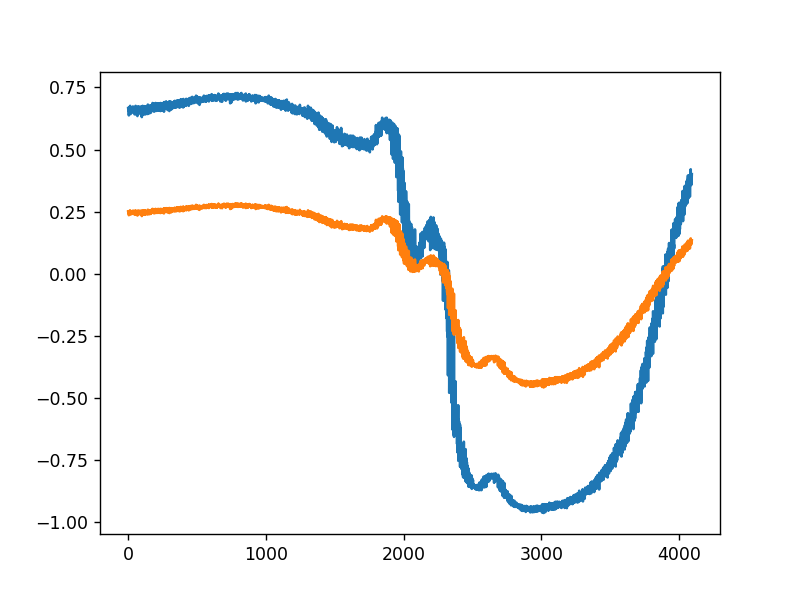

In [129]:
plt.close()
# plt.plot(np.convolve(pd2_1, [1]*10), np.convolve(pd1_1, [1]*10))
plt.plot(np.arctan(pd_diff0*np.pi))
plt.plot(pd_diff0)
plt.show()

In [70]:
T1 = pd_diff1[1800:2150]
T2 = pd_diff1[2200:2590]
T3 = pd_diff1[2590:3190]

<IPython.core.display.Javascript object>


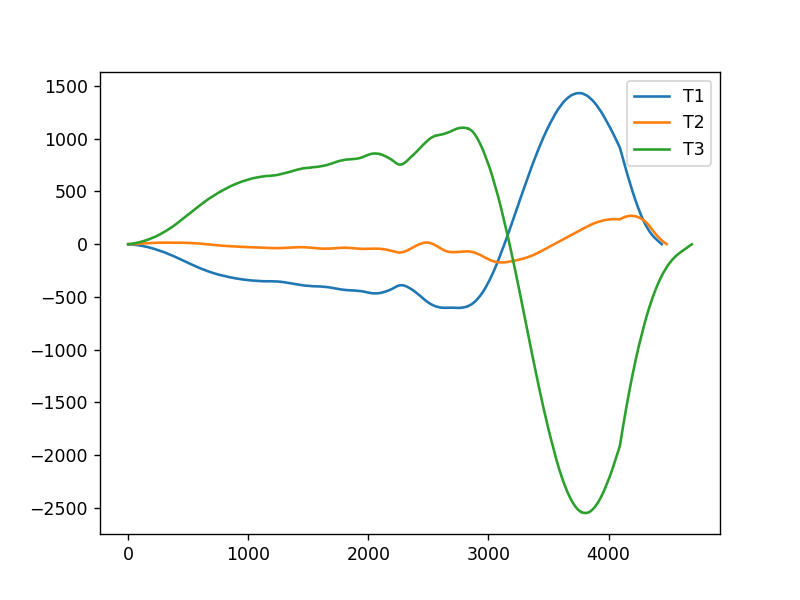

In [76]:
plt.close()
plt.plot(np.convolve(pd_diff0, T1, 'full'), label = 'T1')
plt.plot(np.correlate(pd_diff0, T2, 'full'), label = 'T2')
plt.plot(np.correlate(pd_diff0, T3, 'full'), label = 'T3')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


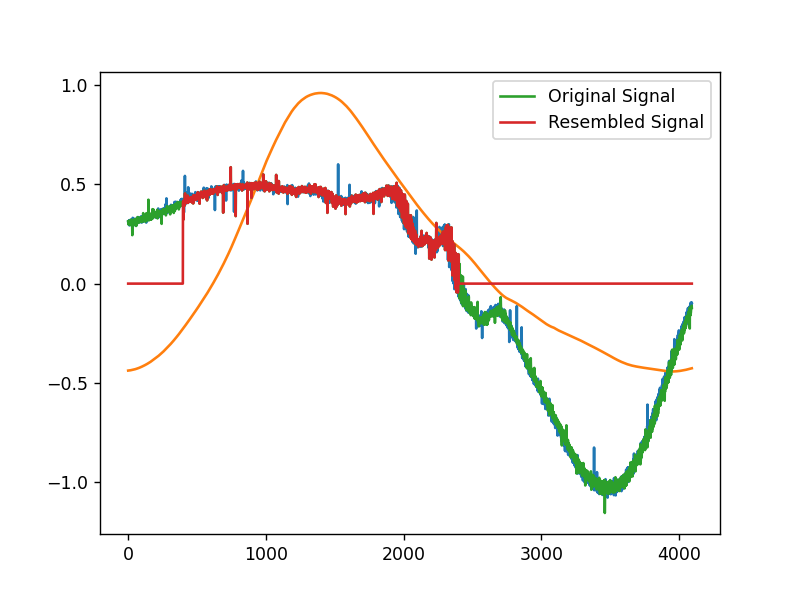

In [18]:
plt.close()
plt.plot(pd_diff0)
plt.plot(np.correlate(pd_diff0[1500:3500], pd_diff1, 'same')/600)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23612\4242192274.py:11: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close()


<IPython.core.display.Javascript object>


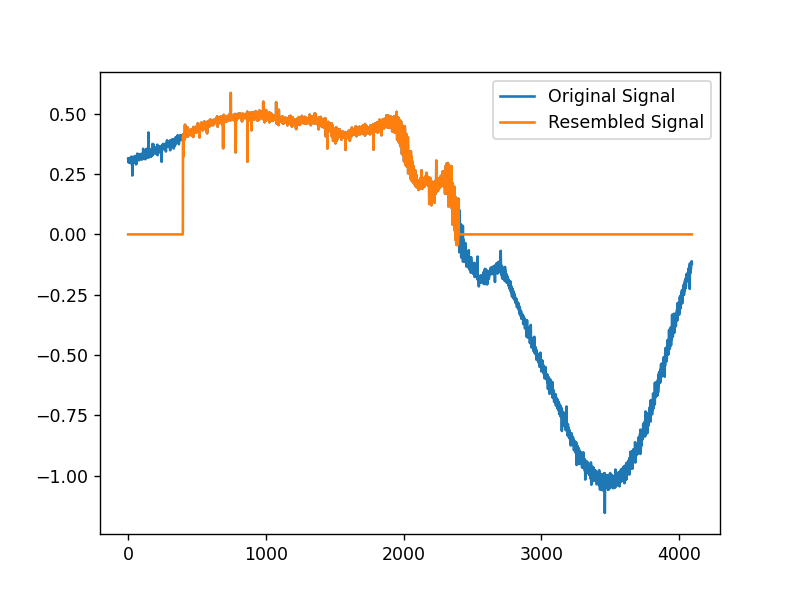

In [24]:
cross_corr = np.correlate(pd_diff0[1500:3500], pd_diff1, mode='full')

# Find the time lag corresponding to the maximum correlation
time_lag = np.argmax(cross_corr) - len(pd_diff0[1500:3500]) + 1

# Set all elements of x(t) outside the range of z(t) to zero
x_resembled = np.zeros_like( pd_diff1)
x_resembled[time_lag:time_lag+len(pd_diff0[1500:3500])] =  pd_diff1[time_lag:time_lag+len(pd_diff0[1500:3500])]

# Plot the original and modified signals
plt.close()
plt.plot(pd_diff1, label='Original Signal')
plt.plot(x_resembled, label='Resembled Signal')
plt.legend()
plt.show()